#### Import Libraries :

In [135]:
import pandas as pd

#### Import Dataset :

In [136]:
df = pd.read_csv(r"C:\Users\Pallavi Pawara\Documents\AirPassengers.csv")

#### Display Top 5 rows :

In [137]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Display Bottom 5 rows :

In [138]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


#### Display total number of rows and columns :

In [139]:
df.shape

(144, 2)

#### View dataset Information :

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Here, we can see that, the datatype of the month column is object type.Hence we need to change object datatype into datetime datatype.

#### Change "Month" column datatype into datetime :

In [141]:
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format = True)


#### Now make "Month" column as index :

In [142]:
indexed_df = df.set_index(["Month"])

In [143]:
indexed_df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [144]:
indexed_df.shape

(144, 1)

#### Plot Graph :

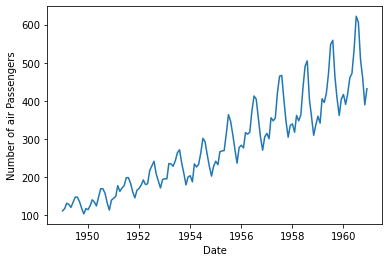

In [145]:
import matplotlib.pyplot as plt

plt.xlabel("Date")
plt.ylabel("Number of air Passengers")
plt.plot(indexed_df)

Here, we can see that mean and variance changes with time, hence our series is not a stationary series .

#### Check stationarity using Rolling Statistics Method :

In [146]:
rolmean = indexed_df.rolling(window = 12).mean()
rolstd  = indexed_df.rolling(window = 12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


#### Plot Rolling Statistics :

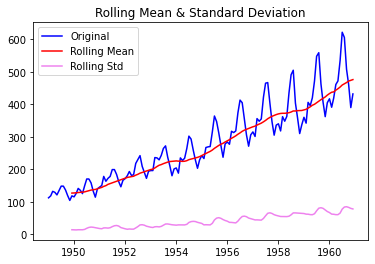

In [147]:
original = plt.plot(indexed_df, color = "blue", label = "Original")
mean     = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std      = plt.plot(rolstd, color = "violet", label = "Rolling Std")

plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show( block = False)

From the "Rolling Statistics plot", we can see that, Mean and variance changes with time. Hence our series is not a stationary series.

#### Check stationarity using ADFC Test :

In [148]:
from statsmodels.tsa.stattools import adfuller

print("Dickey Fuller Test Results:")
test_df = adfuller(indexed_df.iloc[:,0].values, autolag = "AIC")
df_output = pd.Series(test_df[0:4], index = ["Test Statistic","p-value","Lagd Used","Number of Obervations Used"])
for key, value in test_df[4].items():
    df_output["Critical Value (%s)" %key] = value
print(df_output)

Dickey Fuller Test Results:
Test Statistic                  0.815369
p-value                         0.991880
Lagd Used                      13.000000
Number of Obervations Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


Here, we can see that, the "Test statistic" value is greater than "Critical value". 
Therefore we have failed to reject null hypothesis at this point.
Hence, we can say that the Time Series is not stationary :

#### Take log of Original Data :

In [149]:
ind_df_log = np.log(indexed_df)

<IPython.core.display.Javascript object>

In [150]:
ind_df_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


#### Plot of logarithmic data :

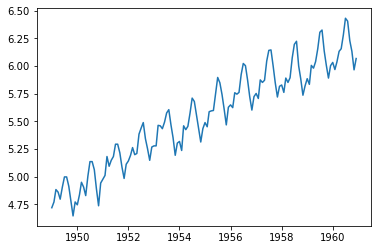

In [151]:
plt.plot(ind_df_log)

##### First Level Differencing of Logarithmic Data :

In [152]:
ind_df_log_1st_diff = ind_df_log.diff()

#### Plot graph of logarithmic data with 1st differencing :

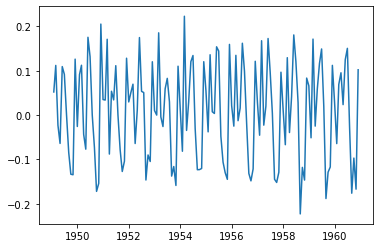

In [153]:
plt.plot(ind_df_log_1st_diff)

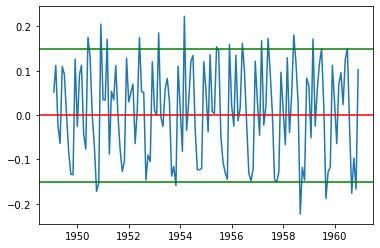

In [154]:
plt.plot(ind_df_log_1st_diff)
plt.axhline(y = 0 , color = "r")
plt.axhline(y = 0.15 , color = "g")
plt.axhline(y = -0.15 , color = "g")

Here, we can see that, mean and variance are almost constant,that means they are not changing with time,hence we can now say that our series is a stationary time series.

#### Check stationarity using Rolling Statistics Method :

In [155]:
rolmean = ind_df_log_1st_diff.rolling(window = 12).mean()
rolstd  = ind_df_log_1st_diff.rolling(window = 12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01    0.006728
1960-09-01    0.007730
1960-10-01    0.010382
1960-11-01    0.006209
1960-12-01    0.005378

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01    0.111374
1960-09-01    0.109497
1960-10-01    0.106223
1960-11-01    0.112489
1960-12-01    0.111669

[144 rows x 1 columns]


#### Plot Rolling Statistics :

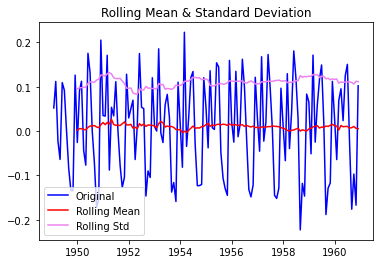

In [156]:
original = plt.plot(ind_df_log_1st_diff, color = "blue", label = "Original")
mean     = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std      = plt.plot(rolstd, color = "violet", label = "Rolling Std")

plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show( block = False)

From the "Rolling Statistics plot", we can see that, Mean and variance are almost constant,that means they are not changing with time. Hence our series is now a stationary series.

#### Check stationarity using ADFC Test :

In [157]:
ind_df_log_1st_diff.isna().sum()

Passengers    1
dtype: int64

#### Remove null values from ind_df_log_1st_diff :

In [158]:
ind_df_log_1st_diff.dropna(inplace = True)

In [159]:
from statsmodels.tsa.stattools import adfuller

print("Dickey Fuller Test Results:")
test_df = adfuller(ind_df_log_1st_diff.iloc[:,0].values, autolag = "AIC")
df_output = pd.Series(test_df[0:4], index = ["Test Statistic","p-value","Lagd Used","Number of Obervations Used"])
for key, value in test_df[4].items():
    df_output["Critical Value (%s)" %key] = value
print(df_output)

Dickey Fuller Test Results:
Test Statistic                 -2.717131
p-value                         0.071121
Lagd Used                      14.000000
Number of Obervations Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


Here, we can see that, the "Test statistic" value is greater than "Critical value". 
Therefore we have failed to reject null hypothesis at this point.
Hence, we can say that the Time Series is not stationary :

##### Second Level Differencing of Logarithmic Data :

In [160]:
ind_df_log_2nd_diff = ind_df_log.diff().diff()

In [161]:
ind_df_log_2nd_diff

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,0.059932
1949-04-01,-0.135107
1949-05-01,-0.041032
...,...
1960-08-01,-0.176733
1960-09-01,-0.150338
1960-10-01,0.079315


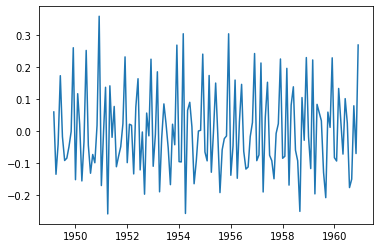

In [162]:
plt.plot(ind_df_log_2nd_diff)

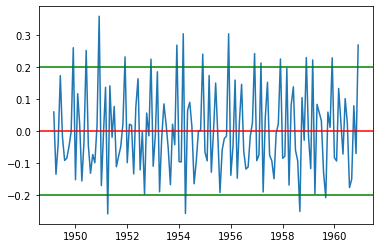

In [163]:
plt.plot(ind_df_log_2nd_diff)
plt.axhline(y = 0 , color = "r")
plt.axhline(y = 0.2 , color = "g")
plt.axhline(y = -0.2 , color = "g")

Here, we can see that, mean and variance are almost constant,that means they are not changing with time,hence we can now say that our series is a stationary time series.

#### Check stationarity using Rolling Statistics Method :


In [164]:
rolmean = ind_df_log_2nd_diff.rolling(window = 12).mean()
rolstd  = ind_df_log_2nd_diff.rolling(window = 12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   -0.003828
1960-09-01    0.001002
1960-10-01    0.002653
1960-11-01   -0.004174
1960-12-01   -0.000830

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01    0.128311
1960-09-01    0.120785
1960-10-01    0.121789
1960-11-01    0.123516
1960-12-01    0.130745

[144 rows x 1 columns]


#### Plot Rolling Statistics :

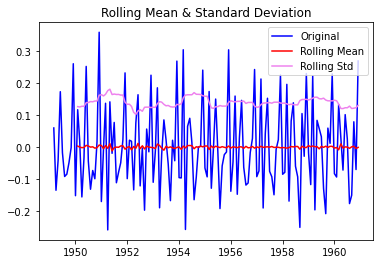

In [165]:
original = plt.plot(ind_df_log_2nd_diff, color = "blue", label = "Original")
mean     = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std      = plt.plot(rolstd, color = "violet", label = "Rolling Std")

plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show( block = False)

From the "Rolling Statistics plot", we can see that, Mean and variance are almost constant,that means they are not changing with time. Hence our series is now a stationary series.

#### Check stationarity using ADFC Test :

In [166]:
ind_df_log_2nd_diff.dropna(inplace = True)

In [167]:
from statsmodels.tsa.stattools import adfuller

print("Dickey Fuller Test Results:")
test_df = adfuller(ind_df_log_2nd_diff.iloc[:,0].values, autolag = "AIC")
df_output = pd.Series(test_df[0:4], index = ["Test Statistic","p-value","Lagd Used","Number of Obervations Used"])
for key, value in test_df[4].items():
    df_output["Critical Value (%s)" %key] = value
print(df_output)

Dickey Fuller Test Results:
Test Statistic               -8.196629e+00
p-value                       7.419305e-13
Lagd Used                     1.300000e+01
Number of Obervations Used    1.280000e+02
Critical Value (1%)          -3.482501e+00
Critical Value (5%)          -2.884398e+00
Critical Value (10%)         -2.578960e+00
dtype: float64


Here, we can see that, the "Test statistic" value is less than "Critical value". 
Therefore we can reject null hypothesis at this point.
Hence, we can say that the Time Series is a stationary Time Series :

#### Plot Formation & Model Formation :

In [168]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Plot of ACF :

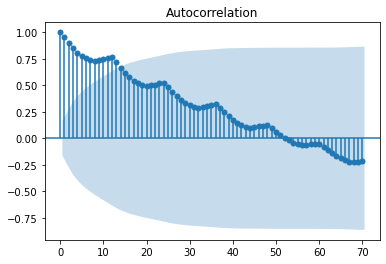

In [169]:
plot_acf(ind_df_log, lags = 70);

#### Plot of PACF :

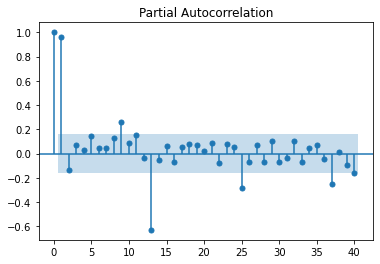

In [170]:
plot_pacf(ind_df_log, lags = 40);

#### Now build ARIMA Model :

In [171]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ind_df_log, order = (2,2,1))

C:\Users\PALLAVI\Anaconda3\Workshop\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\PALLAVI\Anaconda3\Workshop\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

#### Fit the Model :

In [172]:
result = model.fit()

In [173]:
result.params

const                 -0.000072
ar.L1.D2.Passengers    0.240614
ar.L2.D2.Passengers   -0.166609
ma.L1.D2.Passengers   -0.999941
dtype: float64

#### Display Forecasted Values :

In [174]:
forecast_values = result.forecast(steps = 5)
forecast_values

(array([6.12413635, 6.12366909, 6.11737639, 6.11897491, 6.12337588]),
 array([0.10281423, 0.16383535, 0.20096869, 0.22890439, 0.25388276]),
 array([[5.92262416, 6.32564854],
        [5.8025577 , 6.44478047],
        [5.72348499, 6.51126779],
        [5.67033055, 6.56761928],
        [5.62577482, 6.62097693]]))

In [175]:
forecast_values[0]

array([6.12413635, 6.12366909, 6.11737639, 6.11897491, 6.12337588])

#### Take antilog to get the Original Data :

In [176]:
np.exp(forecast_values[0])
forecast_in_original_scale = np.exp(forecast_values[0])
forecast_in_original_scale

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([456.75007083, 456.53669788, 453.67287076, 454.39865812,
       456.40285708])

This is our forecasted (future) data .

#### ........................ThankYou............................................................